In [1]:
# redunadant to use random if we import numpy, random is a package within
import numpy as np
# import random

In [2]:
# randint(a, b) to get random integer from a range (a,b)
np.random.randint(-90, 90)
# random.randint(-90, 90)

61

In [3]:
# get a random number between 0 and 1
np.random.random()
# random.random()

0.31519266649795064

In [4]:
# create variable to hold random gcs coordinate (lat, long)
random_gcs = np.random.randint(-90, 90) + np.random.random()
# random_gcs = random.randint(-90, 90) + random.random()
random_gcs

-62.73761238051704

In [5]:
# loop through to append a list with coordinates
x = 1
coordinates = []

while x < 11:
    random_gcs = np.random.randint(-90, 90) + np.random.random()
    # random_gcs = random.randint(-90, 90) + random.random()
    coordinates.append(random_gcs)
    x += 1

In [6]:
coordinates

[-58.87527552428776,
 -41.87726092447629,
 20.830287728470722,
 -7.367530339382595,
 86.2172052534233,
 75.92111622610683,
 59.033144718038415,
 -4.753841081897037,
 64.48142269987429,
 -66.39306747500711]

In [7]:
# default step value is 1, but a 3 will add the range counted by 3's
import random
random.randrange(-90, 90, step = 3)

42

In [8]:
random.uniform(-90, 90)

48.66830771945342

In [9]:
np.random.uniform(-90, 90)

-9.218188952191511

In [10]:
np.random.uniform(-90.000, 90.000, size = 50)

array([-40.72902901,  73.99803879,  52.62149446, -12.04495031,
        89.83706949,  -4.86949976,  25.91264218,  46.17521152,
        24.71706563, -41.86598384, -18.97447593,   3.41074221,
       -21.64581128, -53.26237181, -25.85197437,   5.99130732,
       -13.07912898,  88.45403875, -10.64897477,  52.69625812,
       -61.56826351, -64.97325457,  43.10306988, -74.06082202,
         6.30893256,  76.55420514, -39.96367925, -70.61862622,
       -12.76973343,  23.84221511,  80.90724207, -56.27177139,
        31.7906045 ,  33.21021789, -79.66539699,  58.67473021,
       -15.95039893, -79.94422436, -37.58365728, -67.71980352,
       -83.48687868,   7.87828566, -54.63771595,  42.51647222,
       -38.93171138,  70.09276926, -73.34776694, -44.7611282 ,
       -74.11078367,  -7.44530976])

In [11]:
import timeit
%timeit np.random.uniform(-90.000, 90.000, size = 1500)

18.7 µs ± 1.62 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
# create a function thata takes in a size to return an array that size with gcs coordinates
def coordinator(amount):
    coordinates = []
    
    coordinates.append(np.random.uniform(-90.000, 90.000, size = amount))
    
    return coordinates

%timeit coordinator

24.6 ns ± 4.94 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [13]:
coordinator(50)

[array([ 63.00830883,  20.81326343, -83.58032925,  -9.82234631,
          7.50574385,  -4.38478974, -86.5288341 ,  83.83902941,
         70.28029487, -57.02790857, -67.37679989, -57.55041313,
        -31.30516099,  27.50819555,  11.0880338 , -16.25426954,
        -25.73602064,   0.1871754 , -75.9901497 ,  10.0225333 ,
          6.90961057, -15.197737  ,  66.76589348,  54.74189687,
        -39.11679793,  75.28623384,  -6.20450131,  84.66224768,
         -1.20319298,   8.55078934,  26.3728389 , -24.4797815 ,
         60.96220797, -64.32272827, -52.22761912,  24.04903804,
        -40.71217234, -80.1870748 , -28.65257211,  57.19495462,
         32.28399607, -88.91722665,  -6.64690103,  48.73740599,
         76.008705  , -55.75070117, -30.49163096, -72.26913237,
        -38.34802695,  30.46158355])]

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# create the coordinates
lats = np.random.uniform(-90.000, 90.000, size = 100)
longs = np.random.uniform(-90.000, 90.000, size = 100)

# zip function allows us to connect these arrays as ordered pairs
gcs_coordinates = zip(lats, longs)

gcs_coordinates

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(gcs_coordinates)

In [17]:
## pip install citipy
from citipy import citipy

In [18]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, # use citipy to get the city name
    citipy.nearest_city(coordinate[0], coordinate[1]).country_code) # to get the country code

chapais ca
bredasdorp za
busselton au
belushya guba ru
parad hu
rocha uy
narsaq gl
salalah om
qaanaaq gl
cape town za
jibuti dj
cape town za
east london za
jamestown sh
hermanus za
guarda pt
saint george bm
san lawrenz mt
belushya guba ru
campos do jordao br
salinas ec
busselton au
arraial do cabo br
bambous virieux mu
tsihombe mg
mto wa mbu tz
amderma ru
hazorasp uz
barentsburg sj
ushuaia ar
chabahar ir
vestmanna fo
ponta do sol cv
brattleboro us
ushuaia ar
east london za
bredasdorp za
torbay ca
hammerfest no
ushuaia ar
longyearbyen sj
dikson ru
jamestown sh
mitsamiouli km
port elizabeth za
caravelas br
margate za
georgetown sh
cidreira br
grand river south east mu
illoqqortoormiut gl
ushuaia ar
georgetown sh
mar del plata ar
pangnirtung ca
manzil salim tn
larsnes no
buchanan lr
klaksvik fo
shaygino ru
ponta do sol cv
taolanaro mg
forio it
hithadhoo mv
mosquera co
grand gaube mu
riberalta bo
vestmannaeyjar is
laguna br
amderma ru
cape town za
margate za
mossendjo cg
siniscola it
mar d

In [19]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

76

In [20]:
cities

['chapais',
 'bredasdorp',
 'busselton',
 'belushya guba',
 'parad',
 'rocha',
 'narsaq',
 'salalah',
 'qaanaaq',
 'cape town',
 'jibuti',
 'east london',
 'jamestown',
 'hermanus',
 'guarda',
 'saint george',
 'san lawrenz',
 'campos do jordao',
 'salinas',
 'arraial do cabo',
 'bambous virieux',
 'tsihombe',
 'mto wa mbu',
 'amderma',
 'hazorasp',
 'barentsburg',
 'ushuaia',
 'chabahar',
 'vestmanna',
 'ponta do sol',
 'brattleboro',
 'torbay',
 'hammerfest',
 'longyearbyen',
 'dikson',
 'mitsamiouli',
 'port elizabeth',
 'caravelas',
 'margate',
 'georgetown',
 'cidreira',
 'grand river south east',
 'illoqqortoormiut',
 'mar del plata',
 'pangnirtung',
 'manzil salim',
 'larsnes',
 'buchanan',
 'klaksvik',
 'shaygino',
 'taolanaro',
 'forio',
 'hithadhoo',
 'mosquera',
 'grand gaube',
 'riberalta',
 'vestmannaeyjar',
 'laguna',
 'mossendjo',
 'siniscola',
 'necochea',
 'abha',
 'punta arenas',
 'othonoi',
 'shetpe',
 'mrirt',
 'petauke',
 'port alfred',
 'sao filipe',
 'leeds',
 's

In [21]:
import requests
requests.__version__

'2.26.0'

In [22]:
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "9c52aa93220062a382edb4a8caedfa3a"

In [23]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c52aa93220062a382edb4a8caedfa3a&q=Boston


In [24]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [25]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [26]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [27]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":66.76,"feels_like":65.01,"temp_min":61.66,"temp_max":69.93,"pressure":1011,"humidity":40},"visibility":10000,"wind":{"speed":24.16,"deg":200,"gust":29.93},"clouds":{"all":100},"dt":1650129673,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1650103290,"sunset":1650151567},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [28]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 66.76,
  'feels_like': 65.01,
  'temp_min': 61.66,
  'temp_max': 69.93,
  'pressure': 1011,
  'humidity': 40},
 'visibility': 10000,
 'wind': {'speed': 24.16, 'deg': 200, 'gust': 29.93},
 'clouds': {'all': 100},
 'dt': 1650129673,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1650103290,
  'sunset': 1650151567},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [30]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [31]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 66.76,
  'feels_like': 65.01,
  'temp_min': 61.66,
  'temp_max': 69.93,
  'pressure': 1011,
  'humidity': 40},
 'visibility': 10000,
 'wind': {'speed': 24.16, 'deg': 200, 'gust': 29.93},
 'clouds': {'all': 100},
 'dt': 1650129673,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1650103290,
  'sunset': 1650151567},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [32]:
# Get the JSON data.
boston_data = city_weather.json()

In [33]:
# Get the JSON data.
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1650103290,
 'sunset': 1650151567}

In [34]:
boston_data["dt"]

1650129673

In [35]:
boston_data["coord"]["lat"]

42.3584

In [36]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 69.93 40 100 24.16


In [37]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 4, 16, 17, 21, 13)

In [38]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-04-16 17:21:13'

In [39]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [40]:
# Create an empty list to hold the weather data.
#city_data = []

# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
#record_count = 1
#set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

In [41]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60) # stop any opperations for 60 seconds

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    # Add 1 to the record count.
    record_count += 1
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [42]:
# try:
  # Do something
# except:
  # print("An exception occurred")


In [43]:
city_data

[{'City': 'Chapais',
  'Lat': 49.7834,
  'Lng': -74.8492,
  'Max Temp': 31.78,
  'Humidity': 72,
  'Cloudiness': 99,
  'Wind Speed': 11.65,
  'Country': 'CA',
  'Date': '2022-04-16 17:24:39'},
 {'City': 'Bredasdorp',
  'Lat': -34.5322,
  'Lng': 20.0403,
  'Max Temp': 60.4,
  'Humidity': 66,
  'Cloudiness': 43,
  'Wind Speed': 15.12,
  'Country': 'ZA',
  'Date': '2022-04-16 17:22:08'},
 {'City': 'Busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max Temp': 59.9,
  'Humidity': 75,
  'Cloudiness': 75,
  'Wind Speed': 11.7,
  'Country': 'AU',
  'Date': '2022-04-16 17:24:40'},
 {'City': 'Parad',
  'Lat': 47.9232,
  'Lng': 20.0297,
  'Max Temp': 44.91,
  'Humidity': 57,
  'Cloudiness': 90,
  'Wind Speed': 14.52,
  'Country': 'HU',
  'Date': '2022-04-16 17:24:40'},
 {'City': 'Rocha',
  'Lat': -34.4833,
  'Lng': -54.3333,
  'Max Temp': 67.93,
  'Humidity': 56,
  'Cloudiness': 87,
  'Wind Speed': 5.68,
  'Country': 'UY',
  'Date': '2022-04-16 17:24:41'},
 {'City': 'Narsaq',
  'Lat': 60.9167,
 

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chapais,49.7834,-74.8492,31.78,72,99,11.65,CA,2022-04-16 17:24:39
1,Bredasdorp,-34.5322,20.0403,60.40,66,43,15.12,ZA,2022-04-16 17:22:08
2,Busselton,-33.6500,115.3333,59.90,75,75,11.70,AU,2022-04-16 17:24:40
3,Parad,47.9232,20.0297,44.91,57,90,14.52,HU,2022-04-16 17:24:40
4,Rocha,-34.4833,-54.3333,67.93,56,87,5.68,UY,2022-04-16 17:24:41
5,Narsaq,60.9167,-46.0500,41.22,63,1,1.72,GL,2022-04-16 17:24:41
6,Salalah,17.0151,54.0924,82.49,83,20,6.91,OM,2022-04-16 17:24:42
7,Qaanaaq,77.4840,-69.3632,-8.86,74,77,8.05,GL,2022-04-16 17:24:42
8,Cape Town,-33.9258,18.4232,66.11,57,0,13.00,ZA,2022-04-16 17:19:31
9,Jibuti,11.5000,42.5000,82.02,43,11,10.16,DJ,2022-04-16 17:24:42


In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [48]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1650129959.145638

In [49]:
# Get today's date
today = time.strftime("%x")
today

'04/16/22'

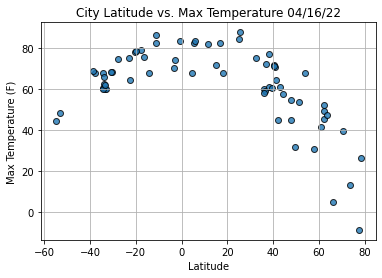

In [50]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

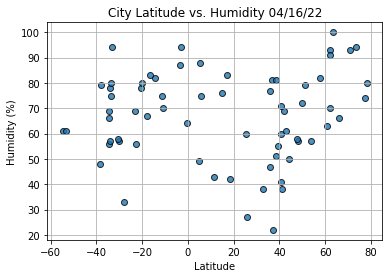

In [51]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

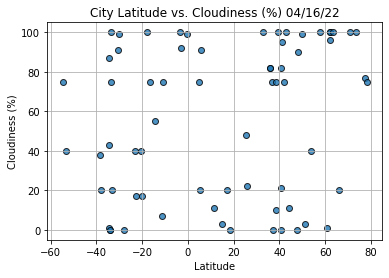

In [52]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

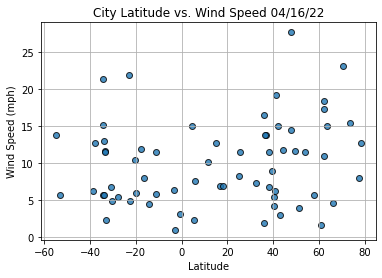

In [53]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [54]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [55]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [56]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [57]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

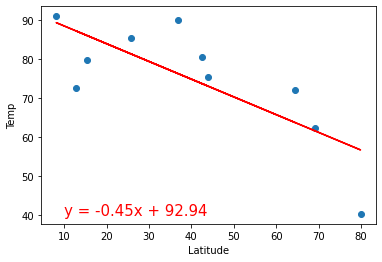

In [58]:
# Import Matplotlib.
import matplotlib.pyplot as plt

# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [59]:
# Perform linear regression.
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
# regress_values = x_values * slope + intercept

# Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
# plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(x_values,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.title(title)
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [60]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [61]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chapais,49.7834,-74.8492,31.78,72,99,11.65,CA,2022-04-16 17:24:39
3,Parad,47.9232,20.0297,44.91,57,90,14.52,HU,2022-04-16 17:24:40
5,Narsaq,60.9167,-46.0500,41.22,63,1,1.72,GL,2022-04-16 17:24:41
6,Salalah,17.0151,54.0924,82.49,83,20,6.91,OM,2022-04-16 17:24:42
7,Qaanaaq,77.4840,-69.3632,-8.86,74,77,8.05,GL,2022-04-16 17:24:42
9,Jibuti,11.5000,42.5000,82.02,43,11,10.16,DJ,2022-04-16 17:24:42
11,Jamestown,42.0970,-79.2353,45.01,69,75,14.97,US,2022-04-16 17:20:47
13,Guarda,40.5373,-7.2658,71.91,41,21,4.29,PT,2022-04-16 17:24:43
14,Saint George,37.1041,-113.5841,72.25,22,0,13.80,US,2022-04-16 17:15:35
15,San Lawrenz,36.0553,14.2040,59.86,77,82,1.99,MT,2022-04-16 17:24:44


In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chapais,49.7834,-74.8492,31.78,72,99,11.65,CA,2022-04-16 17:24:39
3,Parad,47.9232,20.0297,44.91,57,90,14.52,HU,2022-04-16 17:24:40
5,Narsaq,60.9167,-46.0500,41.22,63,1,1.72,GL,2022-04-16 17:24:41
6,Salalah,17.0151,54.0924,82.49,83,20,6.91,OM,2022-04-16 17:24:42
7,Qaanaaq,77.4840,-69.3632,-8.86,74,77,8.05,GL,2022-04-16 17:24:42


In [64]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

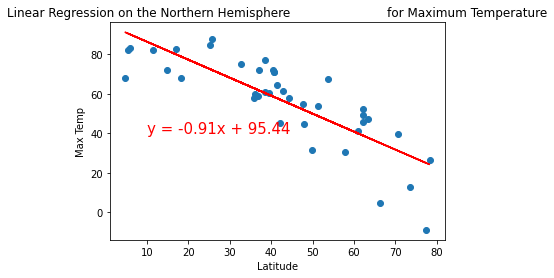

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

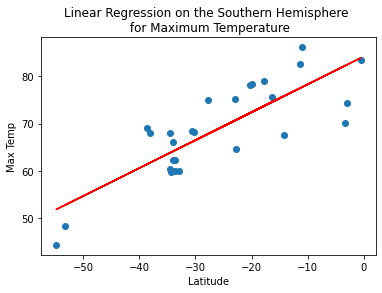

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

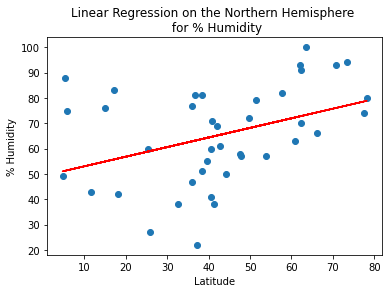

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

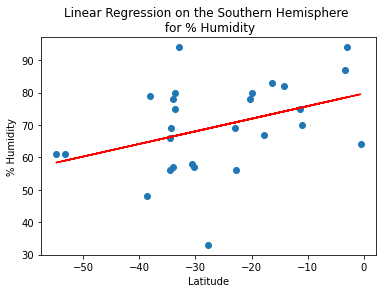

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

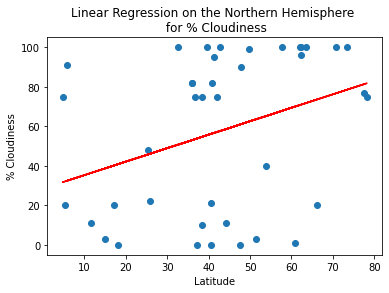

In [69]:
# Linear regression, Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

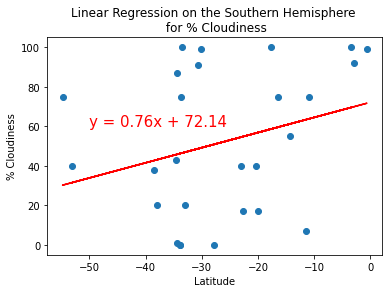

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

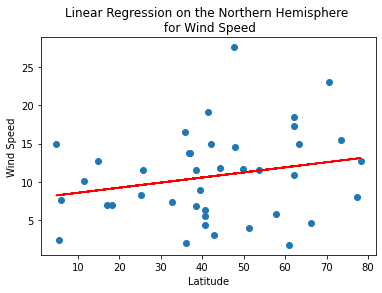

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

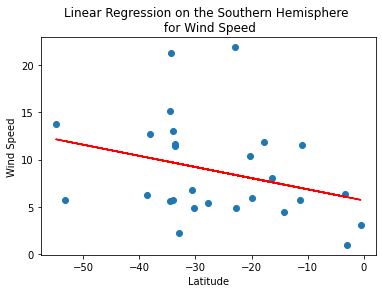

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))